# Portfolio Project: Online Retail Exploratory Data Analysis with Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

#### Load Data

In [2]:
df = pd.read_excel("/kaggle/input/coursera-eda-on-retail-data/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Data Cleaning

In [3]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

#### Droping unwanted columns

In [4]:
df = df.drop(['InvoiceNo'], axis=1)


In [5]:
df.head(0)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


#### Removing duplicates

In [6]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5848, 7)


In [7]:
df.count()

StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [8]:
df = df.drop_duplicates()
df.head(3)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [9]:
df.count()

StockCode      536061
Description    534608
Quantity       536061
InvoiceDate    536061
UnitPrice      536061
CustomerID     401564
Country        536061
dtype: int64

#### Remove null

In [10]:
print(df.isnull().sum())

StockCode           0
Description      1453
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134497
Country             0
dtype: int64


In [11]:
df = df.dropna()
df.count()

StockCode      401564
Description    401564
Quantity       401564
InvoiceDate    401564
UnitPrice      401564
CustomerID     401564
Country        401564
dtype: int64

#### Detect outliers

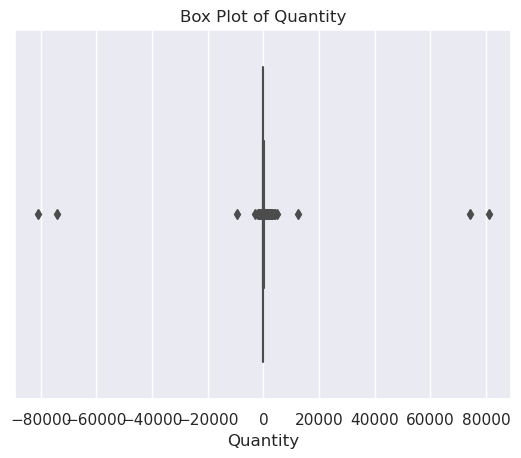

In [12]:
sns.boxplot(x=df['Quantity'])
plt.xlabel('Quantity')
plt.title('Box Plot of Quantity')
plt.show()

In [13]:
# Replace negative values with NaN
df.loc[df['Quantity'] < 0, 'Quantity'] = np.nan

# Drop rows with NaN values in the column
df = df.dropna(subset=['Quantity'])

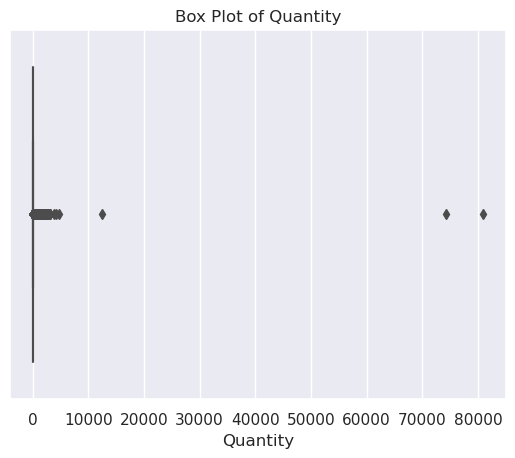

In [14]:
sns.boxplot(x=df['Quantity'])
plt.xlabel('Quantity')
plt.title('Box Plot of Quantity')
plt.show()

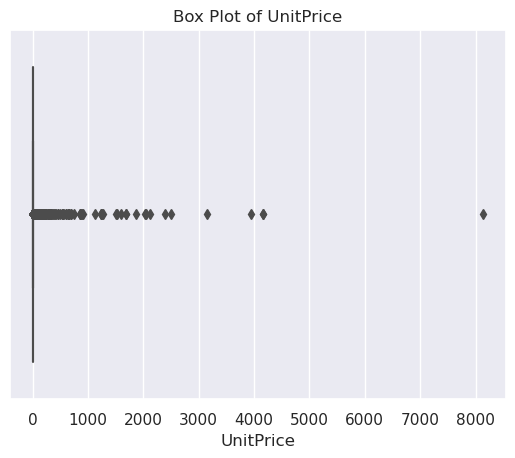

In [15]:
sns.boxplot(x=df['UnitPrice'])
plt.xlabel('UnitPrice')
plt.title('Box Plot of UnitPrice')
plt.show()


In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity        10.0
UnitPrice        2.5
CustomerID    2836.0
dtype: float64


/tmp/ipykernel_20/4249959737.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
/tmp/ipykernel_20/4249959737.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [17]:
# Remove outliers based on column1
df = df[(df['Quantity'] >= Q1['Quantity'] - 1.5 * IQR['Quantity']) & (df['Quantity'] <= Q3['Quantity'] + 1.5 * IQR['Quantity'])]

# Remove outliers based on column2
df = df[(df['UnitPrice'] >= Q1['UnitPrice'] - 1.5 * IQR['UnitPrice']) & (df['UnitPrice'] <= Q3['UnitPrice'] + 1.5 * IQR['UnitPrice'])]


In [18]:
df.shape

(333233, 7)

#### Basic Statistics

In [19]:
# Calculate the central tendency measures - Quantity
mean_value = df['Quantity'].mean()
median_value = df['Quantity'].median()
mode_value = df['Quantity'].mode().values[0]  # Mode can have multiple values, so taking the first one

# Calculate the dispersion measures
std_dev = df['Quantity'].std()
range_value = df['Quantity'].max() - df['Quantity'].min()

# Print the results
print("Central Tendency:")
print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)

print("\nDispersion:")
print("Standard Deviation:", std_dev)
print("Range:", range_value)

Central Tendency:
Mean: 7.550767781102111
Median: 6.0
Mode: 12.0

Dispersion:
Standard Deviation: 6.777345912165323
Range: 26.0


In [20]:
# Calculate the central tendency measures - UnitPrice
mean_value = df['UnitPrice'].mean()
median_value = df['UnitPrice'].median()
mode_value = df['UnitPrice'].mode().values[0]  # Mode can have multiple values, so taking the first one

# Calculate the dispersion measures
std_dev = df['UnitPrice'].std()
range_value = df['UnitPrice'].max() - df['UnitPrice'].min()

# Print the results
print("Central Tendency:")
print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)

print("\nDispersion:")
print("Standard Deviation:", std_dev)
print("Range:", range_value)

Central Tendency:
Mean: 2.194046910119946
Median: 1.65
Mode: 1.25

Dispersion:
Standard Deviation: 1.546119874863203
Range: 7.5


### Visualisations

most bought Quantities

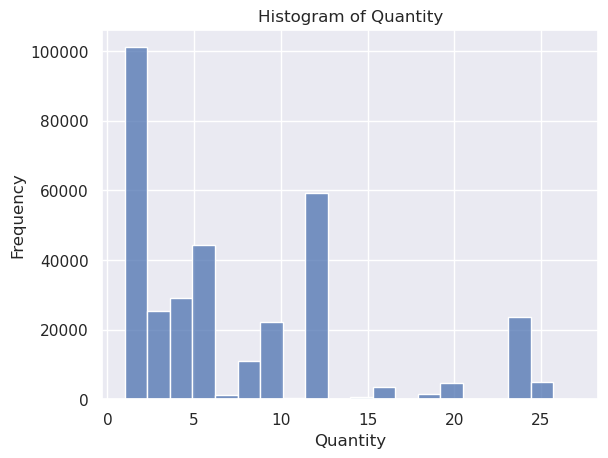

In [21]:
plot = sns.histplot(data=df, x='Quantity', bins=20)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')
plt.show()

Most Bought unitprice

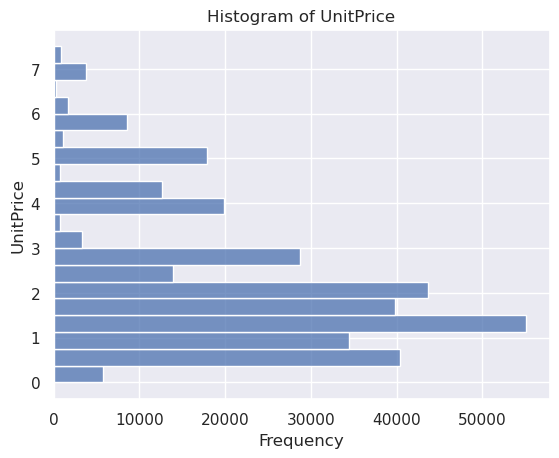

In [22]:
plot= sns.histplot(data=df, y='UnitPrice', bins=20)
plt.ylabel('UnitPrice')
plt.xlabel('Frequency')
plt.title('Histogram of UnitPrice')
plt.show()

Most Bought items

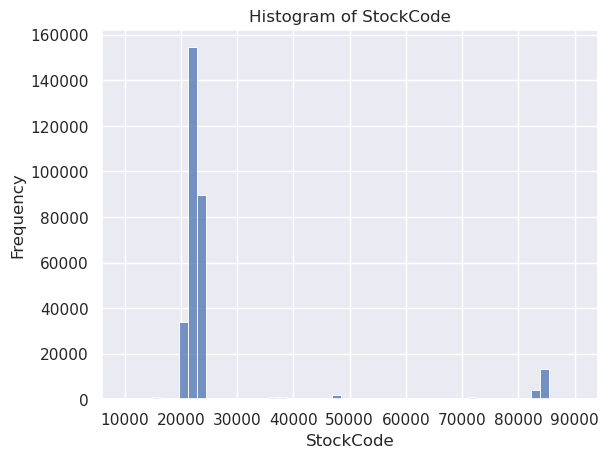

In [23]:
df['StockCode'] = pd.to_numeric(df['StockCode'], errors='coerce').astype(float)

sns.histplot(data=df, x='StockCode', bins=50)
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.title('Histogram of StockCode')
plt.show()

#### Seasonal Data visualization

In [24]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert InvoiceDate to datetime if not already done
df.head(3)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,NaN,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,NaN,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [25]:
#sns.lineplot(data=df, x='InvoiceDate', y='Quantity')
#plt.xlabel('Invoice Date')
#plt.ylabel('Quantity')
#plt.title('Quantity over Time')
#plt.xticks(rotation=45)
#plt.show()

In [26]:
#sns.lineplot(data=df, x='InvoiceDate', y='UnitPrice')
#plt.xlabel('Invoice Date')
#plt.ylabel('UnitPrice')
#plt.title('UnitPrice over Time')
#plt.xticks(rotation=45)
#plt.show()

Correlation b/w Quantity and Unit price

In [27]:
#sns.scatterplot(data=df, x='Quantity', y='UnitPrice')
#plt.xlabel('Quantity')
#plt.ylabel('Unit Price')
#plt.title('Scatter Plot of Quantity vs. Unit Price')
#plt.show()


Top 10 days of the Year

In [28]:
df['Date'] = df['InvoiceDate'].dt.date
top_10_days = df['Date'].value_counts().head(10)
print(top_10_days)

2011-11-06    3007
2011-12-05    2914
2011-11-20    2733
2011-11-23    2700
2011-11-10    2643
2011-10-30    2582
2011-11-17    2572
2011-11-13    2481
2011-11-14    2427
2011-11-22    2416
Name: Date, dtype: int64


In [29]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
average_values = df.groupby('DayOfWeek')['Quantity'].mean()
sorted_values = average_values.sort_values(ascending=False)
top_3_days = sorted_values.head(3)
print(top_3_days)

import calendar

# Convert day numbers to day names
top_3_days_names = top_3_days.index.map(lambda x: calendar.day_name[x])

# Print the top 3 day with names
for month_name, metric_value in zip(top_3_days_names, top_3_days):
    print(f"{month_name}: {metric_value}")

DayOfWeek
4    8.265049
3    8.163501
2    7.958337
Name: Quantity, dtype: float64
Friday: 8.26504894586522
Thursday: 8.163500801548652
Wednesday: 7.9583370003344305


In [30]:
import calendar

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month

monthly_metric = df.groupby('Month')['Quantity'].sum()  # or .mean()
sorted_values = monthly_metric.sort_values(ascending=False)
top_3_months = sorted_values.head(3)
print(top_3_months)
# Convert month numbers to month names
top_3_months_names = [calendar.month_name[int(month)] for month in top_3_months.index]

# Print the top 3 months with names
for month_name, metric_value in zip(top_3_months_names, top_3_months):
    print(f"{month_name}: {metric_value}")


Month
11    371479.0
10    302969.0
9     282123.0
Name: Quantity, dtype: float64
November: 371479.0
October: 302969.0
September: 282123.0


Top  Countires

In [31]:

country_stats = df.groupby('Country').agg({'Quantity': 'sum', 'UnitPrice': 'mean'}).reset_index()

top_10_quantity = country_stats.sort_values('Quantity', ascending=False).head(10)
print(top_10_quantity['Country'])

35    United Kingdom
14           Germany
13            France
10              EIRE
30             Spain
32       Switzerland
3            Belgium
26          Portugal
24            Norway
23       Netherlands
Name: Country, dtype: object


### Conclusion

Based on the exploratory data analysis (EDA) conducted, the following conclusions and findings can be summarized:

1. Quantity:
   - Central Tendency: The mean quantity purchased is approximately 7.55, indicating the average quantity bought in transactions. The median quantity is 6, which suggests that half of the transactions involve quantities less than or equal to 6. The mode of 12 indicates that 12 is the most frequently occurring quantity.
   - Dispersion: The standard deviation of approximately 6.78 indicates a moderate amount of variability in the quantity purchased. The range of 26 shows that the minimum and maximum quantities span a range of 26 units.

2. Unit Price:
   - Central Tendency: The mean unit price is approximately 2.19, indicating the average price of products in transactions. The median unit price is 1.65, which represents the middle value of unit prices. The mode of 1.25 suggests that 1.25 is the most frequently occurring unit price.
   - Dispersion: The standard deviation of approximately 1.55 indicates some variability in unit prices. The range of 7.5 shows that the minimum and maximum unit prices differ by 7.5 units.

3. Top 10 Days:
   - The top 10 days with the highest number of transactions are listed, with the corresponding transaction counts for each day. These dates indicate the busiest days in terms of transaction volume.

4. Top 3 Days of the Week on Average:
   - The average quantity purchased for each day of the week is provided. The top 3 days with the highest average quantity are Friday (8.27), Thursday (8.16), and Wednesday (7.96). This suggests that these days have higher average transaction quantities compared to other days of the week.

5. Top 3 Months:

    - November: With a total quantity purchased of 371,479 units, November had the highest sales volume. It suggests that November is a crucial month for sales, possibly driven by events such as Black Friday and the holiday season.
    - October: October had the second-highest total quantity purchased (302,969 units), indicating a significant amount of sales activity during this month.
    - September: With a total quantity purchased of 282,123 units, September had the third-highest sales volume. It suggests that September is a busy month for sales, potentially driven by various factors like seasonal promotions or back-to-school shopping. 
6. Top 10 countries:
    - United Kingdom
    - Germany
    - France
    - EIRE
    - Spain
    - Switzerland
    - Belgium
    - Portugal
    - Norway
    - Netherlands

